# **Adaptação do Oscilador de Van der Pol em modelo de disparo neuronal (Modelo FitzHugh-Nagumo)**

# **O oscilador de Van der Pol e o modelo neuronal de FitzHugh-Nagumo** 

- PET - Física
- Petianos: Paulo Henrique Cunha Pacheco e Ylana Karolina Santos Lopes 
- Data: 10/01/2025

O presente ```Notebook``` tem como objetivo principal mostrar...

Este ```Notebook``` está organizado da seguinte forma:

- *Sistemas Dinâmicos e Neurociência*
- *O Oscilador de Van der Pol*
- *O Modelo FitzHugh-Nagumo*
- *Conclusão*

## Pré-requisitos

Não sei se tem ainda

## Importando as bibliotecas

In [3]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

## Detalhes das Bibliotecas

In [2]:
%load_ext version_information
%version_information matplotlib, numpy, scipy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.11.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
matplotlib 3.8.0
numpy 1.26.4
scipy 1.12.0
Wed Jan 08 18:18:17 2025 Hora oficial do Brasil

## 1. Sistemas Dinâmicos e Neurociência 

### 1.1 Uma breve introdução à Sistemas Dinâmicos
    
$\quad$ Para começar, precisamos entender alguns conceitos que serão importantes daqui pra frente, principalmente no que diz respeito ao estudo dos sistemas dinâmicos e suas aplicações para modelar o funcionamento de neurônios. 

$\quad$Um sistema dinâmico consiste em um conjunto de variáveis que descrevem seu estado atual e uma ou mais equações diferenciais não-lineares que descrevem a evolução temporal dessas variáveis de estado. Por esse motivo, um sistema dinâmico descreve como um estado em um dado momento depende dos estados em momentos anteriores. Para esse estudo, interpretar um conjunto de equações diferenciais não é tão eficiente para compreender um determinado sistema, em razão disto, utiliza-se o **retrato de fase** de um sistema dinâmico para compreender melhor como ele funciona. Um retrato de fase é, em suma, uma descrição do que acontece com os valores da variáveis de estado com o passar do tempo, e com isso conseguimos fazer uma análise qualitativa da dinâmica do sistema sem se quer ser necessário que saibamos todos os detalhes que governam a natureza do mesmo. Em um retrato de fase é mostrado certos elementos importantes para determinar a natureza da trajetória de qualquer uma dessas variáveis, como principais para o estudo de sistemas dinâmicos temos: 

- *Os pontos de equilíbrio*: Pontos no retrato de fase para o qual todas as trajetórias são direcionadas (pontos de equilíbrio estável) ou da qual todas as trajetórias se afastam (pontos de equilíbrio instável);
- *Ciclos limite*: Trajetórias na qual as variáveis podem se manter ciclicamente ao longo do tempo; 
- *Bifurcações*: Transições entre dinâmicas diferentes em um mesmo sistema.

Esses são alguns conceitos importantes para a compreensão de retratos de fase de qualquer sistema dinâmico.

### 1.2 Neurociência: dinâmica de neurônios

$\quad$Em 1952, Alan Lloyd Hodgkin e Andrew Huxley descreveram um modelo matemático para a descrição da propagação e inativação dos potenciais de ação de um neurônio. O modelo foi chamado de Modelo Hodgkin-Huxley e é formado por um sistema de quatro equações diferenciais que se conectam por meio da condutância de canais de Sódio, Potássio, etc, que são canais dependentes de voltagem. Normalmente, as principais variáveis que descrevem a dinâmica neuronal podem ser classificadas em três classes, de acordo com sua função e escala de tempo: 

- Potencial de membrana.
- Variáveis de excitação, como ativação de uma corrente de Sódio.
- Variáveis de recuperação, como inativação de corrente de Na+ e ativação de corrente rápida
Corrente K+.

$\quad$Todas essas variáveis em um neurônio (além de outras) seguindo as leis de variação temporal das equações diferenciais de uma ou mais formas resultam em dinâmicas também distintas, por exemplo: Podemos ter um neurônio que não dispare uma sinapse para uma determinada intensidade de corrente e o seu potencial de membrana se mantém num certo valor constante, contudo, se estimular o neurônio o suficiente com uma intensidade de corrente maior que um determinado limiar, o potencial de membrana sobe drásticamente e este neurônio dispara, podendo até disparar repetidamente. Se estudarmos o retrato de fase desse tipo de dinâmica, este seria um gráfico da variável de excitação versus Potencial de membrana, e poderíamos dizer que, para um estímulo pouco energético, o sistema tendeu ao equilíbrio (ponto de equilíbrio estável), contúdo, para um estímulo mais energético, o sistema ganha uma trajetória mais alongada (valores maiores do potencial de membrana) que descreve o disparo do neurônio. Se, no caso do neurônio disparar repetidamente, podemos dizer que houve uma bifurcação no sistema e a trajetória de um único disparo se tornou um ciclo limite (disparos seguidos).

## 2. O Oscilador de Van der Pol

$\quad$O oscilador van der Pol (1926), denominado como um oscilador de relaxamento, possui a característica de ser estável porém dissipativo. Este oscilador, frequentemente empregado para a investigação das propriedades de osciladores não lineares, se torna muito útil quando desejamos modelar fenômenos oscilatórios, que no nosso caso, será o disparo de neurônios. A Equação do oscilador de Van der Pol é: 

$$
\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x = 0
$$

onde $\mu$ mede a força do termo de amortecimento e $x(t)$ é a posição do oscilador.

### 2.1 Implementando o oscilador de Van der Pol

$\quad$Ao implementarmos o oscilador de Van der Pol, primeiro definiremos a função em python e, definindo os parâmetros "mu"($\mu$), posição e velocidade inicial, calcularemos a função e criaremos um gráfico de cada resultado. O gráfico final será o retrato de fase do oscilador de Van der Pol, que pode ser interpretado como um **ciclo limite amortecido**.

In [4]:
#  função van der pol
def van_der_pol(t, z, mu):
    x, dxdt = z  
    dzdt = [dxdt, mu * (1 - x**2) * dxdt - x]
    return dzdt


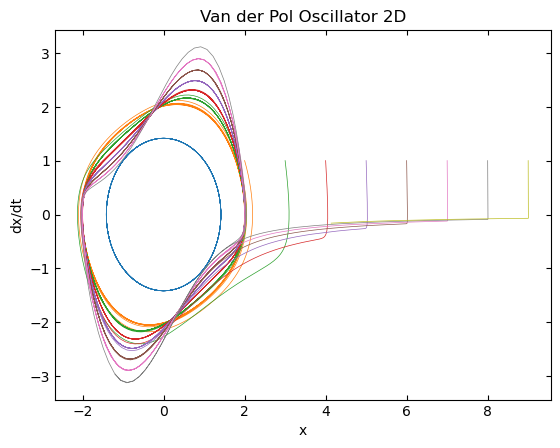

In [16]:
# parametros
mu = 0 ## estabilizando o mu vê melhor a forma do sistema 'how sharp'

z0 = [1.0, 1.0]  # posição e velocidade inicial

# Time points to solve for (from 0 to 50 with 1000 points)
t = np.linspace(0, 50, 1000)

while z0[0] < 10:
    sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
    x = sol.y[0] #posição
    y = sol.y[1] #velocidade
    plt.plot(x, y, linewidth=0.5)
    mu += 0.2
    z0[0] += 1

    
# sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
# x = sol.y[0]
# y = sol.y[1]
# plt.plot(x, y, 'b', linewidth=0.5)
    
#plt.figure(figsize=(8, 6))
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('Van der Pol Oscillator 2D')
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.show()


$\quad$Agora, o código se torna mais simples, pois desejamos criar um gráfico apenas da posição do oscilador ao longo do tempo, e com o gráfico final, observa-se um comportamento distinto de um oscilador normal devido ao termo dissipativo "mu"($\mu$). Se o leitor(a) desejar, pode alterar o valor de "mu" em ambos os códigos e verificar ligeiras variações no formato do retrato de fase ou do gráfico de posições do oscilador.

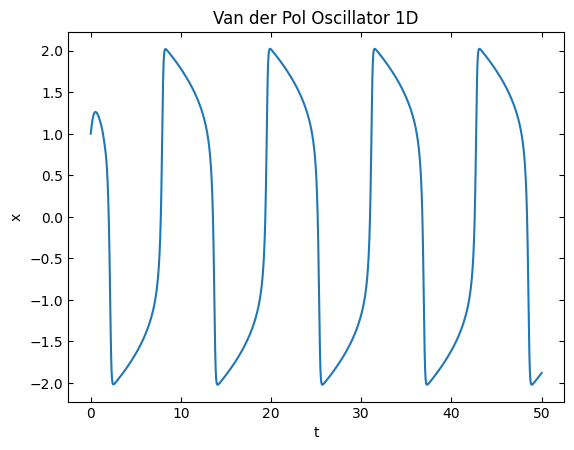

In [5]:
mu = 5

z0 = [1.0, 1.0]
sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
x = sol.y[0]
y = sol.y[1]

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('Van der Pol Oscillator 1D')
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, label='Posição (x)')


## 3. O Modelo FitzHugh-Nagumo

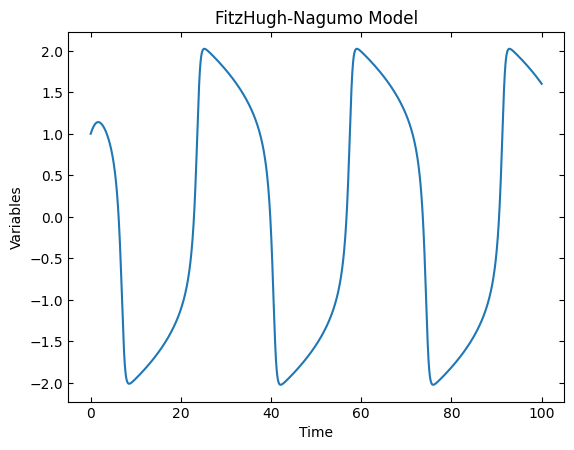

In [6]:
# FitzHugh-Nagumo model parameters
## 2
epsilon = .08
a = 0.0
b = 0.0

# Define the FitzHugh-Nagumo equations
def fitzhugh_nagumo(X, t):
    V, W = X
    dVdt = V - (V**3) / 3 - W + I
    dWdt = epsilon * (V + a - b * W)
    return [dVdt, dWdt]

# Initial conditions
V0 = 1.0
W0 = 1.0
X0 = [V0, W0]

# Time points for integration
t = np.linspace(0, 100, 10000)  # from 0 to 100 with 10000 points

I = 0.5

sol = odeint(fitzhugh_nagumo, X0, t)

# Extract solutions for V and W
V = sol[:, 0]
W = sol[:, 1]



#plt.figure(figsize=(10, 6))
plt.plot(t, V, label='V (Voltage)')
#plt.plot(t, W, label='W (Recovery)')
#plt.plot(V, W, label='Phase Portrait', color='b')
#plt.scatter(V[0], W[0], color='r', label='Initial State')

#plt.plot(V, W, label='Phase Portrait', color='b', linewidth = 2)
plt.title('FitzHugh-Nagumo Model')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
#plt.legend()
plt.show()


Text(0, 0.5, 'Recovery variable, W')

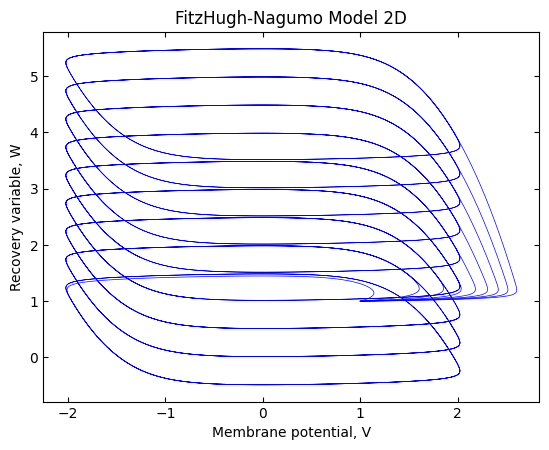

In [7]:
## ?????
while I < 5:
    sol = odeint(fitzhugh_nagumo, X0, t)

    V = sol[:, 0]
    W = sol[:, 1]
    plt.plot(V, W, label='Phase Portrait', color='b', linewidth = 0.5)
    I += 0.5 

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('FitzHugh-Nagumo Model 2D')
plt.xlabel('Membrane potential, V')
plt.ylabel('Recovery variable, W')

## Conclusão

## Conclusão

## Referências

## Referências